# Neural additive model inference

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from nam.inference import load_model, load_stscaler, load_interaction_model, predict

### Settings

In [2]:
# Trained model path
path = r'.\trained_model'

In [3]:
# Device
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cpu


### Dataset for inference

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_data = pd.DataFrame(data = housing.data, columns = housing.feature_names)

In [5]:
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Load trained model and standard scaler

In [6]:
NAM_model = load_model(path, device)
Interaction_model = load_interaction_model(path, device)
scaler = load_stscaler(path)

### Prediction without interaction 

In [7]:
predicted_values = predict(NAM_model, scaler, housing_data, device)

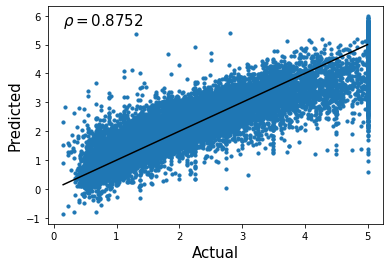

In [8]:
corr_coef = np.corrcoef(housing['target'], predicted_values)[0][1]
fig = plt.plot(figsize = (10, 14))
plt.scatter(housing['target'], predicted_values, s = 10)
plt.plot([housing['target'].min(), housing['target'].max()], [housing['target'].min(), housing['target'].max()], color = 'black')
plt.text(x = housing['target'].min(), y = predicted_values.max()*0.95, s = r"$\rho = $" + f'{corr_coef:.4f}', fontsize = 15)
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted', fontsize = 15)
plt.show()

### Prediction with interaction

In [9]:
predicted_values = predict(NAM_model, scaler, housing_data, device, Interaction_model)

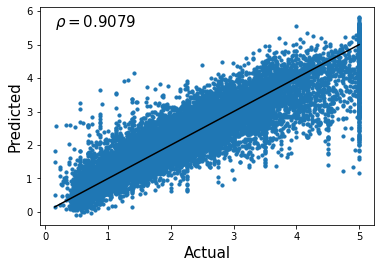

In [10]:
corr_coef = np.corrcoef(housing['target'], predicted_values)[0][1]
fig = plt.plot(figsize = (10, 14))
plt.scatter(housing['target'], predicted_values, s = 10)
plt.plot([housing['target'].min(), housing['target'].max()], [housing['target'].min(), housing['target'].max()], color = 'black')
plt.text(x = housing['target'].min(), y = predicted_values.max()*0.95, s = r"$\rho = $" + f'{corr_coef:.4f}', fontsize = 15)
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted', fontsize = 15)
plt.show()